### Assignment1

Remember -> submission using itslearning, both notebook and github repo *deadline on 22.11.2021*

#### Task 1 (3 points):

Regression $\to$ Superconductivity Data Set

The goal here is to predict the critical temperature based on the features extracted.

https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

* Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained score as a function of the chosen parameter. Plot the coefficient magnitudes for the best model. 

In [2]:
# setting up required environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 3000
pd.set_option('display.width', 1200)
%matplotlib inline 

In [3]:
# loading dataset from provided link and showing the first 5 rows 

import zipfile, requests, io
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip'
file_name = 'train.csv'
data = pd.read_csv(zipfile.ZipFile(io.BytesIO(requests.get(URL, stream=True).content)).open(file_name))
data.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
# importing 3 different regression models from sklearn
# linear regresion = a linear approach for modelling the relationship between a scalar response and one or more explanatory variables 
# Ridge = a model tuning method that is used to analyse any data that suffers from multicollinearity.
# Lasso = a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean.

from sklearn.linear_model import LinearRegression, Ridge, Lasso

linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()

In [5]:
# making traning set by spliting data while we want to predict the critical temperature "critical_temp"

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('critical_temp', axis=1), data[['critical_temp']], test_size= 0.2)

In [6]:
# fiting data from Superconductivity Data Set into three regression models including Linearregression, ridge, and lasso
linear.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1843274.139761019, tolerance: 1997.1995514368925
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [7]:
# calculating mean squired eroor for all three regression models including Linearregression, ridge, and lasso

from sklearn.metrics import mean_squared_error

print('rmse linear regression: ', np.sqrt(mean_squared_error(y_test, linear.predict(X_test))))
print('rmse ridge regression: ', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))
print('rmse lasso regression: ', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))


rmse linear regression:  17.577418357906904
rmse ridge regression:  17.597462281417922
rmse lasso regression:  18.42387590058169


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2659158.8383040144, tolerance: 1997.1995514368925
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2670471.311969319, tolerance: 1997.1995514368925
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2678534.7936570677, tolerance: 1997.1995514368925
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

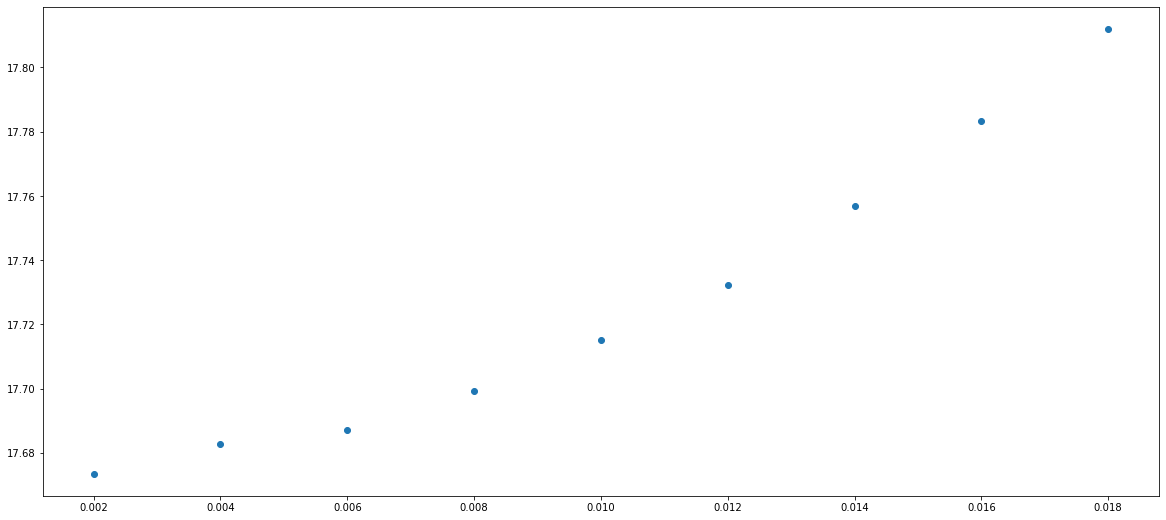

In [8]:
# plot the new obtained score

alpha = np.arange(.002, .02, .002)
rmse = []

for a in alpha:
    rmse.append(np.sqrt(mean_squared_error(y_test, Lasso(alpha=a).fit(X_train, y_train).predict(X_test))))
    
plt.figure(figsize=(20,9))
plt.scatter(alpha, rmse)

In [9]:
# simple manual optimization for lasso parameters (at least 5 different values)

from sklearn.model_selection import GridSearchCV

lasso_parameter = {'alpha':[0.005, .01, 0.02, 0.03, 0.05]}
grid_search = GridSearchCV(Lasso(), param_grid=lasso_parameter, cv=5)
grid_search.fit(X_train, y_train)
print("Bet Parameter = ",grid_search.best_params_)
print("Best Estimator = ", grid_search.best_estimator_)
print("Best Score = ", grid_search.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2147416.18676842, tolerance: 1587.1683843732255
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2117868.5499325204, tolerance: 1604.6020807718128
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2149647.7966823652, tolerance: 1603.7168053746134
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

Bet Parameter =  {'alpha': 0.005}
Best Estimator =  Lasso(alpha=0.005)
Best Score =  0.7320606597042277


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2673715.7771729245, tolerance: 1997.1995514368925
  model = cd_fast.enet_coordinate_descent(


In [10]:
print('rmse best lasso regression: ', np.sqrt(mean_squared_error(y_test, grid_search.predict(X_test))))

rmse best lasso regression:  17.683823983140613


#### Task 2 (3 points):

Binary classification $\to$ Default of credit card clients Data Set

The goal here is to predict the default payment next month.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

* Fit two binary classification models to predict the client's credit card default. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained accuracy as a function of the chosen parameter.. Plot the feature importance. 

In [11]:
# loading creditcards dataset and checking the heading for the first 5 raws

URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
data = pd.read_excel(URL, header=1)
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
# checking data shape
data = data.set_index(data.ID)
data.shape

(30000, 25)

In [13]:
# checking data colomns
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'], dtype='object')

In [14]:
# making traning set by spliting data while we want to predict "default payment next month"
X_train, X_test, y_train, y_test = train_test_split(data.drop('default payment next month', axis=1), data[['default payment next month']], test_size= 0.2)

In [15]:
# Fit two binary classification modelsincluding Random Forest Classifier and MLPClassifier to predict the client's credit card default

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

logistic = LogisticRegression()
forest = RandomForestClassifier()
nn = MLPClassifier()

logistic.fit(X_train, y_train)
forest.fit(X_train, y_train)
nn.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-15-421c293c9a3b>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Pr

MLPClassifier()

In [16]:
# checking classification report 
# Report accuracy with the default parameters of each model

from sklearn.metrics import classification_report

print(classification_report(y_test, forest.predict(X_test)))

print(classification_report(y_test, logistic.predict(X_test)))

print(classification_report(y_test, nn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4648
           1       0.66      0.36      0.47      1352

    accuracy                           0.81      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.81      0.79      6000

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4648
           1       0.00      0.00      0.00      1352

    accuracy                           0.77      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.60      0.77      0.68      6000

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      4648
           1       0.40      0.46      0.43      1352

    accuracy                           0.72      6000
   macro avg       0.62      0.63      0.62      6000
weighted avg       0.74      0.72      0.73      6000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

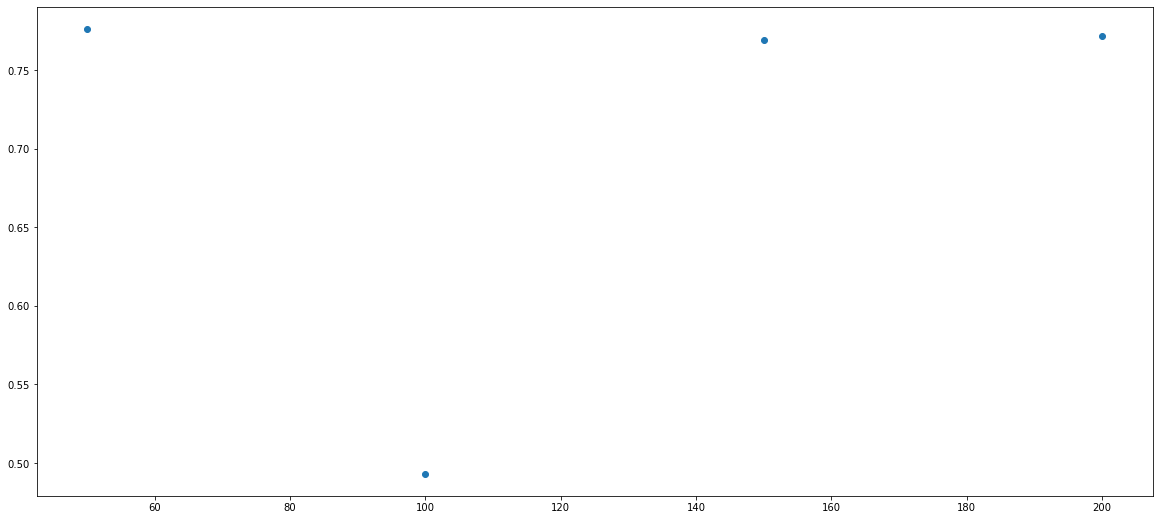

In [17]:
# Perform a simple manual optimization for one of the default parameters 
# plot the new obtained accuracy as a function of the chosen parameter.. Plot the feature importance

from sklearn.metrics import accuracy_score

hidden_layer_sizes = np.arange(50,250, 50)
accuracy = []

for layer in hidden_layer_sizes:
    accuracy.append(accuracy_score(y_test, MLPClassifier(hidden_layer_sizes=(layer, ),
              activation='relu', solver='adam', 
             alpha=0.0001, batch_size='auto',
            learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
             max_iter=1000, shuffle=True, random_state=None, tol=0.0001,
            verbose=False, warm_start=False, momentum=0.9, 
             nesterovs_momentum=True, early_stopping=False,
            validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
             n_iter_no_change=10).fit(X_train, y_train).predict(X_test)))
    
plt.figure(figsize=(20,9))
plt.scatter(hidden_layer_sizes, accuracy)

#### Task 3 (9 points): 

Multiclass & binary classification $\to$ Drug consumption (quantified) Data Set

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

* Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter. 
* Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes. 
* Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
 - one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).
 
 Comment your results, and point which selection of classes have better accuracy.

In [18]:
# loading Drug consumption dataset and checking the heading for the first 5 raws
URL='https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data'
data = pd.read_csv(URL, header=None)
data.columns = ["v"+str(x) for x in np.arange(0,32,1)]
data.head(5)

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [19]:
# checking shape of data
data.set_index(data.v0, inplace=True)
data.drop('v0', axis=1, inplace=True)
data.shape

(1885, 31)

In [20]:
# making traning set by spliting data 
x = data.iloc[:,0:12]
y = data.iloc[:,14:15]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
# Fiting multiclass classification models including Random Forest Classifier, MLP Classifier, and Multi Output Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier

nn = MLPClassifier()
forest = RandomForestClassifier()

multi_nn = MultiOutputClassifier(nn, n_jobs=-1)
multi_forest = MultiOutputClassifier(forest, n_jobs=-1)

multi_nn.fit(x_train, y_train)
multi_forest.fit(x_train, y_train)

print('nn accuracy: ', accuracy_score(y_test, multi_nn.predict(x_test)))
print('forest accuracy: ', accuracy_score(y_test, multi_forest.predict(x_test)))

nn accuracy:  0.6684350132625995
forest accuracy:  0.6816976127320955


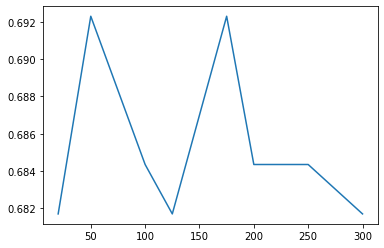

In [22]:
# Perform a simple manual optimization for one of the default parameters for one of the previous models. 
# Plot the new obtained accuracy as a function of the chosen parameter.
n_estimator = [20, 50, 100, 125, 150, 175,200, 250, 300]
accuracy = []
for es in n_estimator:
    accuracy.append(accuracy_score(y_test, MultiOutputClassifier(RandomForestClassifier(n_estimators=es), n_jobs=-1).fit(x_train, y_train).predict(x_test)))

plt.plot(n_estimator, accuracy)

In [26]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

y = data.iloc[:,14:17]
y["v15"] = y["v15"].apply(lambda x: 0 if x == 'CL2' else 1)
y["v16"] = y["v16"].apply(lambda x: 0 if x == 'CL2' else 1)
y["v17"] = y["v17"].apply(lambda x: 0 if x == 'CL2' else 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
forest = KNeighborsClassifier(n_neighbors=3)
multi_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_forest.fit(x_train, y_train)
print('forest accuracy: ', accuracy_score(y_test, multi_forest.predict(x_test)))

forest accuracy:  0.713527851458886


In [ ]:
# Run one binary classification model for 1 features out of 18. Test the performance of the model
y = data.iloc[:,14:17]
y["v15"] = y["v15"].apply(lambda x: 0 if x == 'CL2' else 1)
y["v16"] = y["v16"].apply(lambda x: 0 if x == 'CL2' else 1)
y["v17"] = y["v17"].apply(lambda x: 0 if x == 'CL2' else 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
forest = RandomForestClassifier()
multi_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_forest.fit(x_train, y_train)
print('forest accuracy: ', accuracy_score(y_test, multi_forest.predict(x_test)))

In [27]:
# Run one binary classification model for 2 features out of 18. Test the performance of the model 
y = data.iloc[:,14:17]
y["v15"] = y["v15"].apply(lambda x: 0 if x in ['CL2', 'CL3'] else 1)
y["v16"] = y["v16"].apply(lambda x: 0 if x in ['CL2', 'CL3'] else 1)
y["v17"] = y["v17"].apply(lambda x: 0 if x in ['CL2', 'CL3'] else 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
forest = RandomForestClassifier()
multi_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_forest.fit(x_train, y_train)
print('forest accuracy: ', accuracy_score(y_test, multi_forest.predict(x_test)))

forest accuracy:  0.583554376657825


In [28]:
# Run one binary classification model for 3 features out of 18. Test the performance of the model 
y = data.iloc[:,14:17]
y["v15"] = y["v15"].apply(lambda x: 0 if x in ['CL2', 'CL3', 'CL4'] else 1)
y["v16"] = y["v16"].apply(lambda x: 0 if x in ['CL2', 'CL3', 'CL4'] else 1)
y["v17"] = y["v17"].apply(lambda x: 0 if x in ['CL2', 'CL3', 'CL4'] else 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
forest = RandomForestClassifier()
multi_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_forest.fit(x_train, y_train)
print('forest accuracy: ', accuracy_score(y_test, multi_forest.predict(x_test)))

forest accuracy:  0.46419098143236076
